In [1]:
library(igraph)




Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [4]:
egoNodes = dir("gplus",pattern = "edges")
# egoNodes_id = numeric()
# for (i in 1:length(egoNodes))
# {
#   egoNodes_id = c(egoNodes_id,strsplit(egoNodes[i],".edges"))
# }
print(egoNodes)
# print(egoNodes_id)

  [1] "100129275726588145876.edges" "100329698645326486178.edges"
  [3] "100466178325794757407.edges" "100500197140377336562.edges"
  [5] "100518419853963396365.edges" "100521671383026672718.edges"
  [7] "100535338638690515335.edges" "100637660947564674695.edges"
  [9] "100668989009254813743.edges" "100715738096376666180.edges"
 [11] "100720409235366385249.edges" "100962871525684315897.edges"
 [13] "101130571432010257170.edges" "101133961721621664586.edges"
 [15] "101185748996927059931.edges" "101263615503715477581.edges"
 [17] "101373961279443806744.edges" "101499880233887429402.edges"
 [19] "101541879642294398860.edges" "101560853443212199687.edges"
 [21] "101626577406833098387.edges" "101848191156408080085.edges"
 [23] "101997124338642780860.edges" "102170431816592344972.edges"
 [25] "102340116189726655233.edges" "102615863344410467759.edges"
 [27] "102778563580121606331.edges" "103236949470535942612.edges"
 [29] "103241736833663734962.edges" "103251633033550231172.edges"
 [31] "103

## Question 18: How many personal networks are there? ##

In [5]:
print(length(egoNodes))

[1] 132


## Question 19: For the 3 personal networks (node ID given below), plot the in-degree and out-degree distribution of these personal networks. Do the personal networks have a similar in and out degree distribu- tion. In this question, you should have 6 plots. ##

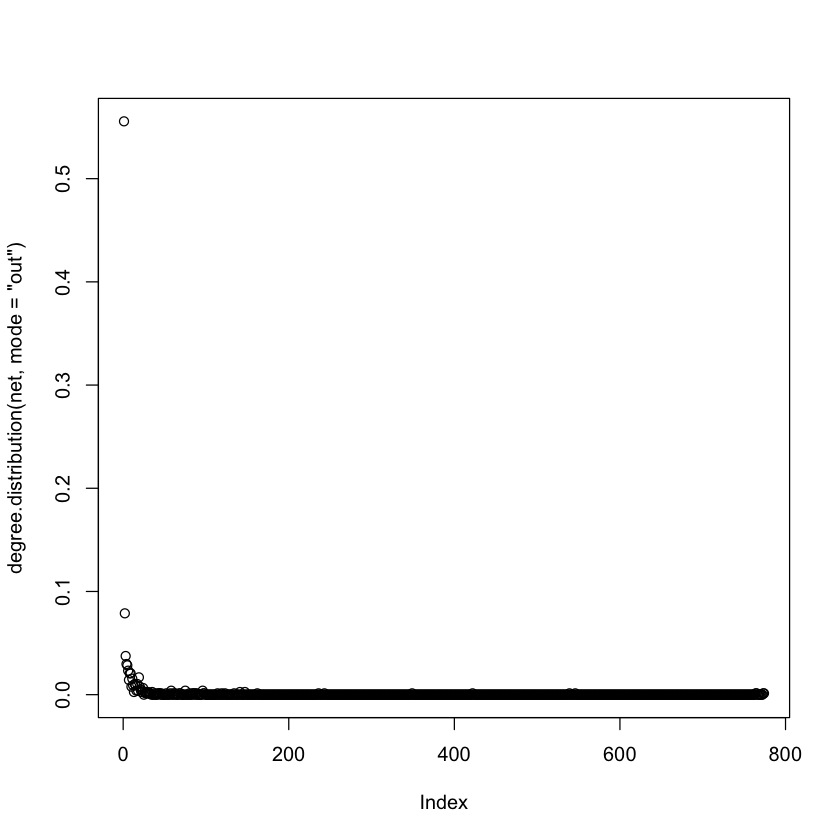

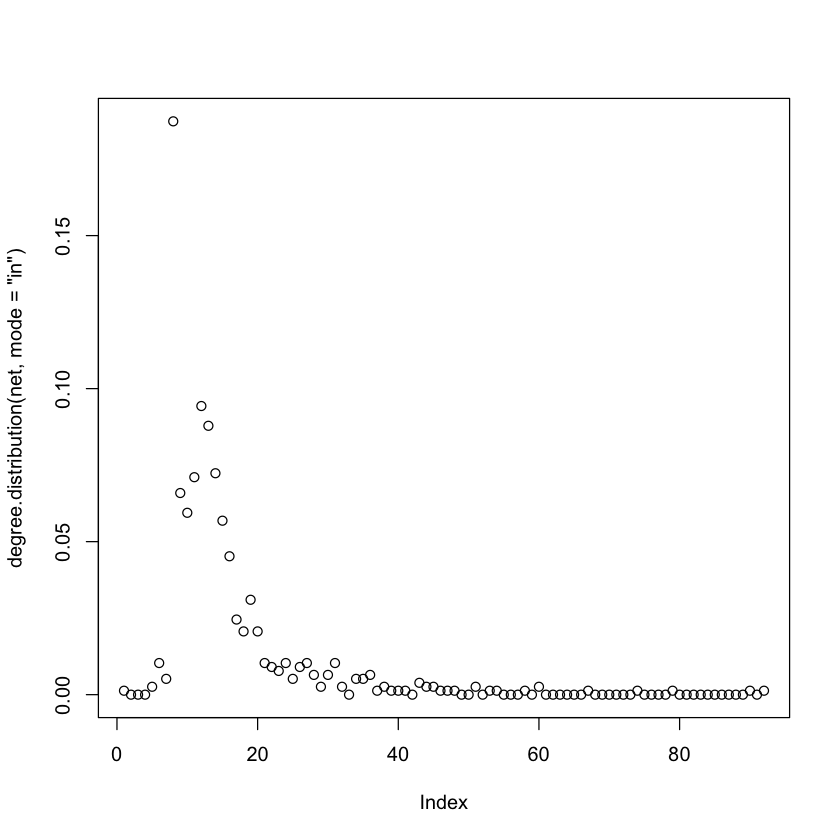

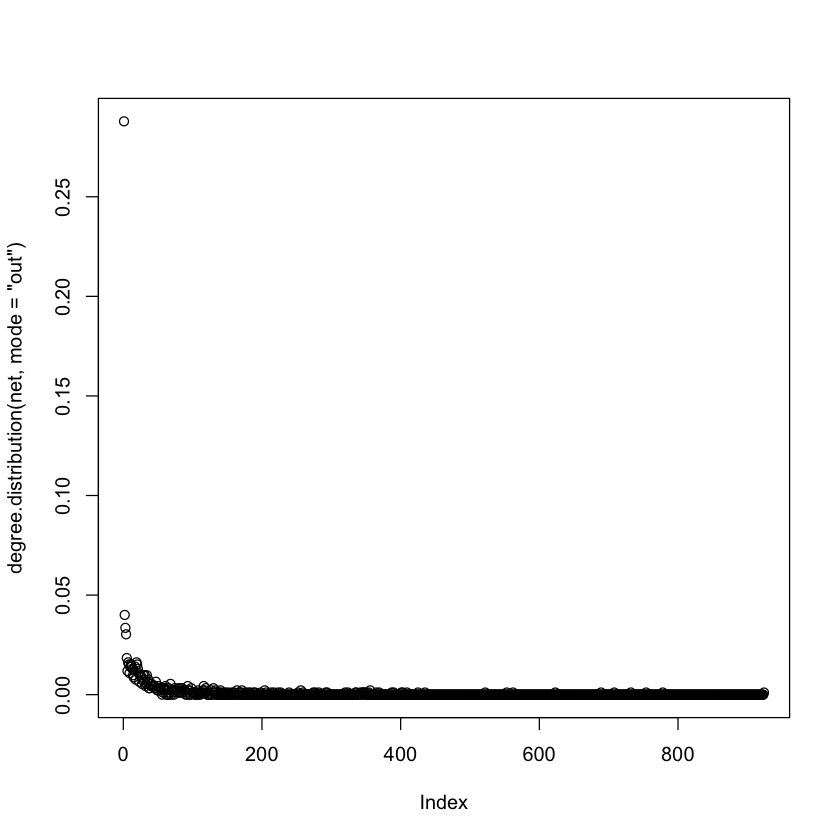

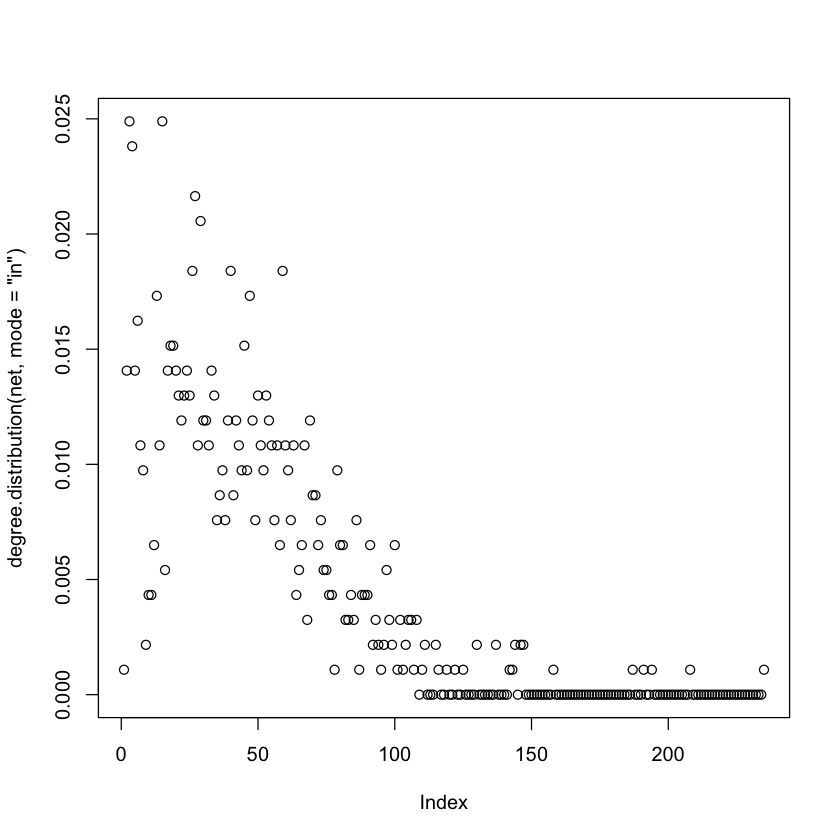

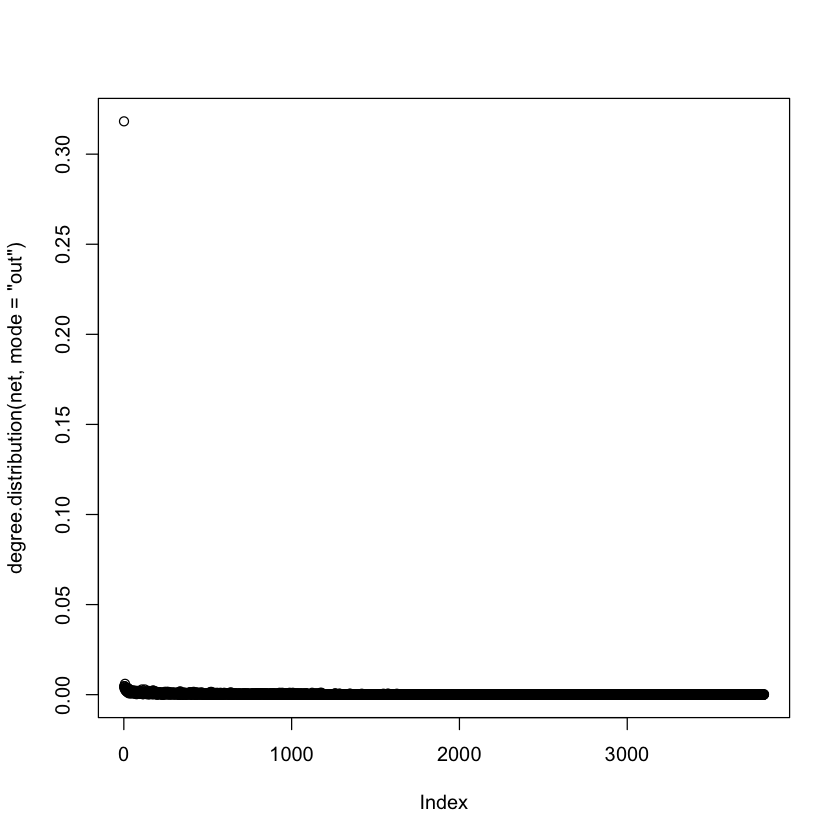

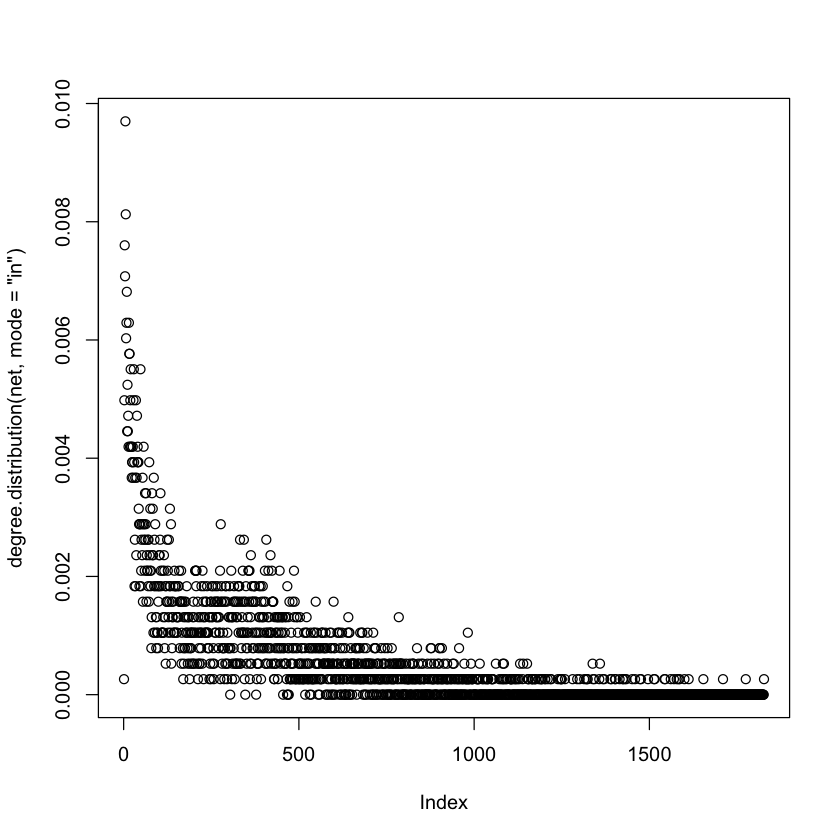

In [6]:
nodeId = c("109327480479767108490", "115625564993990145546", "101373961279443806744")
create_personal_network = function(nodeId){
#     print(nodeId[i])
    edges_file = paste("gplus/", nodeId, ".edges", sep="")
    net = read.graph(edges_file, format = "ncol", directed=TRUE)
    net = add.vertices(net, nv = 1, name = nodeId)
    edge_list = c()
    for (node in 1:(vcount(net)-1))
    {
        edge_list = c(edge_list, c(vcount(net), node))
    }
    net = add_edges(net, edge_list)
    plot(degree.distribution(net,mode="out"))
    plot(degree.distribution(net,mode="in"))
    return(net)
}
net1 = create_personal_network(nodeId[1])
net2 = create_personal_network(nodeId[2])
net3 = create_personal_network(nodeId[3])

### Question 20: For the 3 personal networks picked in question 19, ex- tract the community structure of each personal network using Walk- trap community detection algorithm. Report the modularity scores and plot the communities using colors. Are the modularity scores similar? In this question, you should have 3 plots. ###

[1] 0.2527654

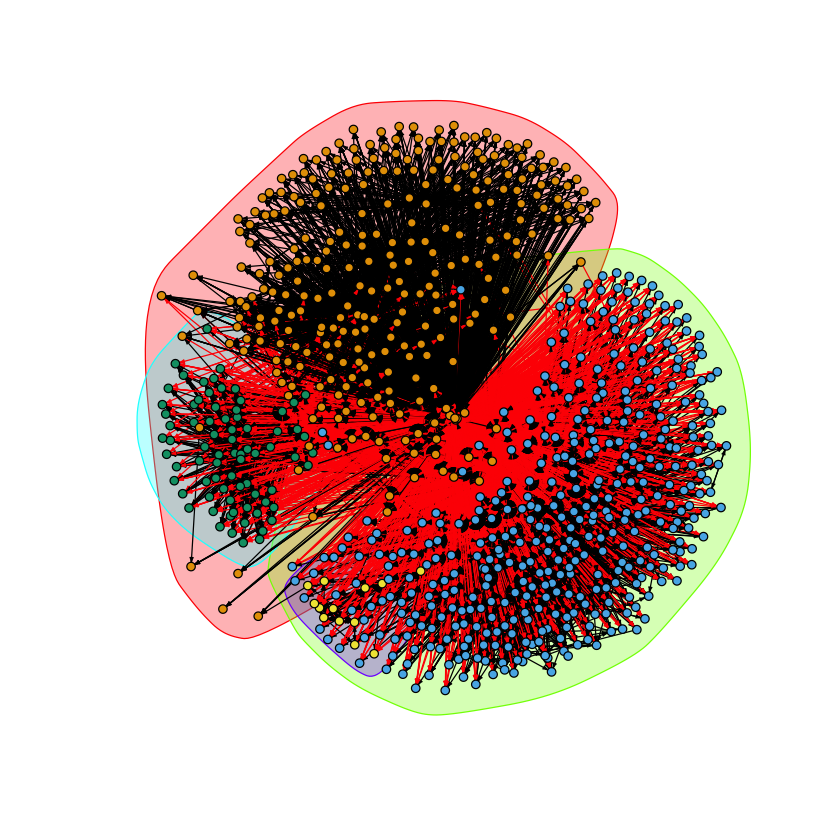

In [7]:
walk_trap_community = walktrap.community(net1)
modularity(walk_trap_community)
plot(walk_trap_community, net1, vertex.label=NA, vertex.size=3, edge.arrow.size=.2)



In [11]:
sizes = sizes(walk_trap_community)
for (i in 1:length(walk_trap_community)){
    print(paste("The ",i,"th community has size of ",  sizes[i]))
}


[1] "The  1 th community has size of  288"
[1] "The  2 th community has size of  397"
[1] "The  3 th community has size of  76"
[1] "The  4 th community has size of  13"


[1] 0.3194726

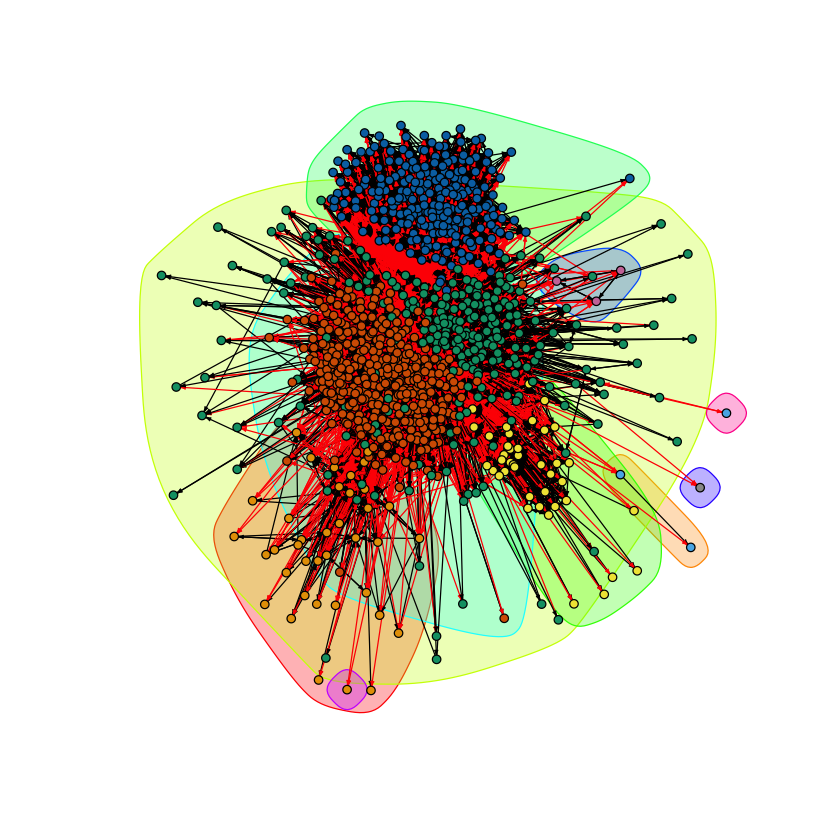

In [8]:
walk_trap_community2 = walktrap.community(net2)
modularity(walk_trap_community2)
plot(walk_trap_community2, net2, vertex.label=NA, vertex.size=3, edge.arrow.size=.2)



In [12]:
sizes = sizes(walk_trap_community2)
for (i in 1:length(walk_trap_community2)){
    print(paste("The ",i,"th community has size of ",  sizes[i]))
}


[1] "The  1 th community has size of  37"
[1] "The  2 th community has size of  2"
[1] "The  3 th community has size of  256"
[1] "The  4 th community has size of  40"
[1] "The  5 th community has size of  233"
[1] "The  6 th community has size of  350"
[1] "The  7 th community has size of  3"
[1] "The  8 th community has size of  1"
[1] "The  9 th community has size of  1"
[1] "The  10 th community has size of  1"


In [ ]:
walk_trap_community3 = walktrap.community(net3)
modularity(walk_trap_community3)
plot(walk_trap_community3, net3, vertex.label=NA, vertex.size=3, edge.arrow.size=.2)

[1] 0.1910903

In [ ]:
sizes = sizes(walk_trap_community3)
for (i in 1:length(walk_trap_community3)){
    print(paste("The ",i,"th community has size of ",  sizes[i]))
}


Question 21: Based on the expression for h and c, explain the meaning of homogeneity and completeness in words.


A clustering result satisfies homogeneity if all of its communities contain only data points which are members of a single circle. 

A clustering result satisfies completeness if all the data points that are members of a given circle are elements of the same communities.

